### Up_lifting_Model for 2 star customers

In [1]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
PM_Source=pd.read_csv('PM_Source.csv')
Records,Attribute=PM_Source.shape
print("PM_Source Records {} and Attributes {}".format(Records,Attribute))
PM_Source.head()

PM_Source Records 1500 and Attributes 81


,CUSTOMERNO,STARFLAG,STAR,AGE,NO_OF_SB_ACCOUNT,SB_ACCOUNT_BAL,NO_OF_CA_ACCOUNT,CA_ACCOUNT_BAL,NO_OF_TOTAL_FACILITIES_AVAILED,NO_OF_DIGITAL_FACILITIES_AVAILED,...,WORKING_CAPITAL,LOCKER,GENDER,INSURANCE1,STATE,DISTRICT,PINCODE,BRANCH_CLASSIFICATION,DEMAT,WHATSAPP_BANKING
0,849,2,2,56,1,94,1,928447,10,3,...,N,Y,F,N,CHENNAI,coimbatore,641025,Metro,N,N
1,4324,2,2,51,1,266,0,0,9,3,...,N,N,M,Y,CHENNAI,NANGANALLUR,600061,Urban,N,N
2,12817,2,2,71,1,401511,0,0,5,0,...,N,N,F,N,CHENNAI,CHENNAI40,600040,Metro,N,N
3,16678,4,4,51,1,2889,0,0,12,3,...,Y,Y,M,Y,CHENNAI,CHENNAI42.,600042,Metro,N,N
4,23060,1,1,41,2,511787,0,0,7,2,...,Y,Y,M,N,CHENNAI,MDS.40.,600040,Metro,N,N


In [2]:
Product_List=pd.read_csv('Product_List.csv')
Records,Attribute=Product_List.shape
print("Product_List Records {} and Attributes {}".format(Records,Attribute))
Product_List.head()

Product_List Records 55856 and Attributes 4


,CUSTOMERNO,CATEGORY,INTERESTED,SUBCATEGORY
0,5685124,AdvanceProduct,Y,JewelLoan
1,5489073,AdvanceProduct,Y,JewelLoan
2,6128202,RecommendedProduct,N,LifeInsurance
3,4029105,AlternateIncomePro,N,GeneralInsurance
4,1400533,AlternateIncomePro,N,LifeInsurance


### PM_Source has all entites
#### Customer_Demographics (Customer no, DOB,Creation date,Age,Gender,home_branch,branch_classification)
#### Customer_Geographics (Customer no,district,state,pincode)
#### OtherAccounts Entity (SB Flag,CA Flag,FD Flag,RD Flag,ccod Flag,jl limit,loan limit,od limit)
#### OtherProducts Entity (Mobile Banking Flag,Net Banking Flag,Locker Flag,POS Flag,Insurance,etc)
#### Transaction Details ( Spend wise transaction , Non-Spend wise transaction , ATM transation , UPI Transaction )
#### Star Customer Details ( Previous Star quarter details , Current Star quarter details , Difference Between Star Details )

In [3]:
import numpy as np
PM_Source["Todaydate"]=pd.datetime.today().strftime('%Y-%m-%d')
PM_Source["Todaydate"]=PM_Source["Todaydate"].apply(pd.to_datetime)
PM_Source["DOB"]=pd.to_datetime(PM_Source.DOB)
PM_Source["CREATION_DATE"]=pd.to_datetime(PM_Source.CREATION_DATE)
PM_Source["Vintage"]=((PM_Source["Todaydate"] - PM_Source["CREATION_DATE"]) / np.timedelta64(1,'Y')).astype('int')
DropColumns=["DOB","CREATION_DATE","Todaydate","HOME_BRANCH","CUSTOMERNO","AGE_SLAB","FACILITY_S_LAB","STATE","DISTRICT","PINCODE","HOME_BRANCH","BRANCH_CLASSIFICATION"]
PM_Source.drop(DropColumns,inplace=True,axis=1)
PM_Source

/tmp/ipykernel_226483/374156839.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  PM_Source["Todaydate"]=pd.datetime.today().strftime('%Y-%m-%d')
/tmp/ipykernel_226483/374156839.py:4: UserWarning: Parsing '27/05/1965' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  PM_Source["DOB"]=pd.to_datetime(PM_Source.DOB)
/tmp/ipykernel_226483/374156839.py:4: UserWarning: Parsing '20/12/1969' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  PM_Source["DOB"]=pd.to_datetime(PM_Source.DOB)
/tmp/ipykernel_226483/374156839.py:4: UserWarning: Parsing '21/05/1950' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  PM_Source["DOB"]=pd.to_datetime(PM_Source.DOB)
/tmp/ipykernel_226483/374156839.py:4: UserWarning: Parsing '26/03/1969' in DD/MM/YYYY forma

,STARFLAG,STAR,AGE,NO_OF_SB_ACCOUNT,SB_ACCOUNT_BAL,NO_OF_CA_ACCOUNT,CA_ACCOUNT_BAL,NO_OF_TOTAL_FACILITIES_AVAILED,NO_OF_DIGITAL_FACILITIES_AVAILED,NO_OF_PAYMENT_FACILITIES_AVAILED,...,MOBILE,ASBA,AADHAAR,WORKING_CAPITAL,LOCKER,GENDER,INSURANCE1,DEMAT,WHATSAPP_BANKING,Vintage
0,2,2,56,1,94,1,928447,10,3,0,...,Y,N,N,N,Y,F,N,N,N,19
1,2,2,51,1,266,0,0,9,3,0,...,Y,N,Y,N,N,M,Y,N,N,22
2,2,2,71,1,401511,0,0,5,0,0,...,Y,N,N,N,N,F,N,N,N,23
3,4,4,51,1,2889,0,0,12,3,0,...,Y,N,N,Y,Y,M,Y,N,N,22
4,1,1,41,2,511787,0,0,7,2,0,...,Y,N,Y,Y,Y,M,N,N,N,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,39,1,8457,0,0,5,3,0,...,Y,N,N,N,N,M,N,N,N,8
1496,0,0,46,1,18264,0,0,6,3,0,...,Y,N,Y,N,N,M,N,N,N,8
1497,1,1,38,1,121872,0,0,7,3,0,...,Y,N,N,N,Y,M,N,N,N,8
1498,1,1,65,1,205198,0,0,6,3,0,...,Y,N,Y,N,N,M,N,N,N,9


In [4]:
PM_Source.fillna(0,inplace=True)
#Encoding Operations
categoricaldata=PM_Source.select_dtypes(include=['object'])
categoricaldata

,INSURANCE,SB_FLAG,CA_FLAG,ATM_ELIGIBLE,ATM_CARD_AVAILED,NET_BANKING_AVAILED,MOBILE_BANKING_AVAILED,NET_OR_MOBILE_BANKING_AVAILED,NB_OR_MB_LOGINLAST6MONTHS,POS_ELIGIBLE,...,MIAL_ID,MOBILE,ASBA,AADHAAR,WORKING_CAPITAL,LOCKER,GENDER,INSURANCE1,DEMAT,WHATSAPP_BANKING
0,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,N,N,N,Y,F,N,N,N
1,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,N,Y,N,N,M,Y,N,N
2,Y,Y,N,Y,N,N,N,N,N,Y,...,Y,Y,N,N,N,N,F,N,N,N
3,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,N,N,Y,Y,M,Y,N,N
4,Y,Y,N,Y,N,Y,Y,Y,N,Y,...,Y,Y,N,Y,Y,Y,M,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Y,Y,N,Y,Y,Y,Y,Y,Y,N,...,N,Y,N,N,N,N,M,N,N,N
1496,Y,Y,N,Y,Y,Y,Y,Y,Y,N,...,N,Y,N,Y,N,N,M,N,N,N
1497,Y,Y,N,Y,Y,Y,Y,Y,Y,N,...,N,Y,N,N,N,Y,M,N,N,N
1498,Y,Y,N,Y,Y,Y,Y,Y,Y,N,...,Y,Y,N,Y,N,N,M,N,N,N


In [5]:
categoricaldata.replace("","N",inplace=True)
categoricaldata.replace(["Y","YES","y"],1,inplace=True)
categoricaldata.replace("N",0,inplace=True)
categoricaldata["GENDER"].replace("M",1,inplace=True)
categoricaldata["GENDER"].replace("F",0,inplace=True)
categoricaldata

,INSURANCE,SB_FLAG,CA_FLAG,ATM_ELIGIBLE,ATM_CARD_AVAILED,NET_BANKING_AVAILED,MOBILE_BANKING_AVAILED,NET_OR_MOBILE_BANKING_AVAILED,NB_OR_MB_LOGINLAST6MONTHS,POS_ELIGIBLE,...,MIAL_ID,MOBILE,ASBA,AADHAAR,WORKING_CAPITAL,LOCKER,GENDER,INSURANCE1,DEMAT,WHATSAPP_BANKING
0,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,1,0,0
2,1,1,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,0,0
4,1,1,0,1,0,1,1,1,0,1,...,1,1,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
1496,1,1,0,1,1,1,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
1497,1,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,1,1,0,0,0
1498,1,1,0,1,1,1,1,1,1,0,...,1,1,0,1,0,0,1,0,0,0


In [6]:
continousdata=PM_Source.select_dtypes(exclude=['object'])
continousdata

,STARFLAG,STAR,AGE,NO_OF_SB_ACCOUNT,SB_ACCOUNT_BAL,NO_OF_CA_ACCOUNT,CA_ACCOUNT_BAL,NO_OF_TOTAL_FACILITIES_AVAILED,NO_OF_DIGITAL_FACILITIES_AVAILED,NO_OF_PAYMENT_FACILITIES_AVAILED,...,INCOME,SB_Q1,CA_Q1,SB_Q2,CA_Q2,SB_Q3,CA_Q3,SB_Q4,CA_Q4,Vintage
0,2,2,56,1,94,1,928447,10,3,0,...,20000000,951,741385,3396,433105,4560,891662,2277,371755,19
1,2,2,51,1,266,0,0,9,3,0,...,912000,24847,0,76669,0,116667,0,108710,0,22
2,2,2,71,1,401511,0,0,5,0,0,...,5000000,118190,0,204786,0,287530,0,370974,0,23
3,4,4,51,1,2889,0,0,12,3,0,...,9000000,89209,0,15987,0,29658,0,45778,0,22
4,1,1,41,2,511787,0,0,7,2,0,...,1250000,183758,0,216721,0,128395,0,549444,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,39,1,8457,0,0,5,3,0,...,500000,8210,0,4718,0,27800,0,11009,0,8
1496,0,0,46,1,18264,0,0,6,3,0,...,2350000,106616,0,74373,0,32669,0,82491,0,8
1497,1,1,38,1,121872,0,0,7,3,0,...,5000000,616754,0,199811,0,79990,0,55464,0,8
1498,1,1,65,1,205198,0,0,6,3,0,...,1850000,121566,0,82679,0,174464,0,217977,0,9


In [7]:
sampledataframe=pd.concat([continousdata,categoricaldata],axis=1)
sampledataframe

,STARFLAG,STAR,AGE,NO_OF_SB_ACCOUNT,SB_ACCOUNT_BAL,NO_OF_CA_ACCOUNT,CA_ACCOUNT_BAL,NO_OF_TOTAL_FACILITIES_AVAILED,NO_OF_DIGITAL_FACILITIES_AVAILED,NO_OF_PAYMENT_FACILITIES_AVAILED,...,MIAL_ID,MOBILE,ASBA,AADHAAR,WORKING_CAPITAL,LOCKER,GENDER,INSURANCE1,DEMAT,WHATSAPP_BANKING
0,2,2,56,1,94,1,928447,10,3,0,...,1,1,0,0,0,1,0,0,0,0
1,2,2,51,1,266,0,0,9,3,0,...,1,1,0,1,0,0,1,1,0,0
2,2,2,71,1,401511,0,0,5,0,0,...,1,1,0,0,0,0,0,0,0,0
3,4,4,51,1,2889,0,0,12,3,0,...,1,1,0,0,1,1,1,1,0,0
4,1,1,41,2,511787,0,0,7,2,0,...,1,1,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,39,1,8457,0,0,5,3,0,...,0,1,0,0,0,0,1,0,0,0
1496,0,0,46,1,18264,0,0,6,3,0,...,0,1,0,1,0,0,1,0,0,0
1497,1,1,38,1,121872,0,0,7,3,0,...,0,1,0,0,0,1,1,0,0,0
1498,1,1,65,1,205198,0,0,6,3,0,...,1,1,0,1,0,0,1,0,0,0


1    878
2    232
3    201
0    167
4     19
5      3
Name: STAR, dtype: int64
{1: 878, 2: 232, 3: 201, 0: 167, 4: 19, 5: 3}


<BarContainer object of 6 artists>

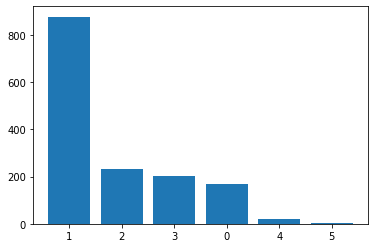

In [8]:
print(sampledataframe["STAR"].value_counts())
StarLabelDictionary=dict(sampledataframe["STAR"].value_counts())
xaxis=list(StarLabelDictionary.keys())
xaxis=[str(i) for i in xaxis]
yaxis=list(StarLabelDictionary.values())
print(StarLabelDictionary)
plt.bar(xaxis,yaxis)

In [9]:
sampledataframe=sampledataframe[sampledataframe["STAR"]<3]

In [10]:
sampledataframe["STAR"].value_counts()

1    878
2    232
0    167
Name: STAR, dtype: int64

In [11]:
sampledataframe["StarLabel"]=0
sampledataframe.loc[sampledataframe["STAR"]==2,"StarLabel"]=1

/tmp/ipykernel_226483/2431878052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledataframe["StarLabel"]=0


0    1045
1     232
Name: StarLabel, dtype: int64
{0: 1045, 1: 232}


<BarContainer object of 2 artists>

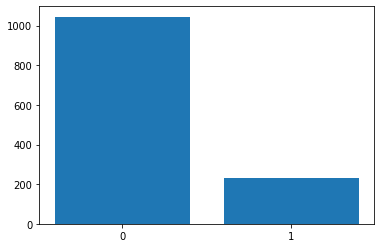

In [12]:
print(sampledataframe["StarLabel"].value_counts())
StarLabelDictionary=dict(sampledataframe["StarLabel"].value_counts())
xaxis=list(StarLabelDictionary.keys())
xaxis=[str(i) for i in xaxis]
yaxis=list(StarLabelDictionary.values())
print(StarLabelDictionary)
plt.bar(xaxis,yaxis)

### Dependent Variable is StarLabel

In [13]:
print("The Percentage of 2-star customer is {}".format(yaxis[1] / sum(yaxis)*100))

The Percentage of 2-star customer is 18.16758026624902


In [14]:
sampledataframe["Total_Account_Balance"]=sampledataframe["SB_ACCOUNT_BAL"]+sampledataframe["CA_ACCOUNT_BAL"]
sampledataframe

/tmp/ipykernel_226483/3008445938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledataframe["Total_Account_Balance"]=sampledataframe["SB_ACCOUNT_BAL"]+sampledataframe["CA_ACCOUNT_BAL"]


,STARFLAG,STAR,AGE,NO_OF_SB_ACCOUNT,SB_ACCOUNT_BAL,NO_OF_CA_ACCOUNT,CA_ACCOUNT_BAL,NO_OF_TOTAL_FACILITIES_AVAILED,NO_OF_DIGITAL_FACILITIES_AVAILED,NO_OF_PAYMENT_FACILITIES_AVAILED,...,ASBA,AADHAAR,WORKING_CAPITAL,LOCKER,GENDER,INSURANCE1,DEMAT,WHATSAPP_BANKING,StarLabel,Total_Account_Balance
0,2,2,56,1,94,1,928447,10,3,0,...,0,0,0,1,0,0,0,0,1,928541
1,2,2,51,1,266,0,0,9,3,0,...,0,1,0,0,1,1,0,0,1,266
2,2,2,71,1,401511,0,0,5,0,0,...,0,0,0,0,0,0,0,0,1,401511
4,1,1,41,2,511787,0,0,7,2,0,...,0,1,1,1,1,0,0,0,0,511787
5,1,1,52,2,9214,0,0,12,3,0,...,0,0,0,1,0,1,1,0,0,9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,39,1,8457,0,0,5,3,0,...,0,0,0,0,1,0,0,0,0,8457
1496,0,0,46,1,18264,0,0,6,3,0,...,0,1,0,0,1,0,0,0,0,18264
1497,1,1,38,1,121872,0,0,7,3,0,...,0,0,0,1,1,0,0,0,0,121872
1498,1,1,65,1,205198,0,0,6,3,0,...,0,1,0,0,1,0,0,0,0,205198


In [15]:
sampledataframe["Total_Acct_sum_of_Q1"]=sampledataframe["SB_Q1"]+sampledataframe["CA_Q1"]
sampledataframe["Total_Acct_sum_of_Q4"]=sampledataframe["SB_Q4"]+sampledataframe["CA_Q4"]

/tmp/ipykernel_226483/2499429944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledataframe["Total_Acct_sum_of_Q1"]=sampledataframe["SB_Q1"]+sampledataframe["CA_Q1"]
/tmp/ipykernel_226483/2499429944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledataframe["Total_Acct_sum_of_Q4"]=sampledataframe["SB_Q4"]+sampledataframe["CA_Q4"]


In [16]:
sampledataframe["Total_Acct_Sum_Difference"]=sampledataframe["Total_Acct_sum_of_Q1"]-sampledataframe["Total_Acct_sum_of_Q4"]

/tmp/ipykernel_226483/2978609348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledataframe["Total_Acct_Sum_Difference"]=sampledataframe["Total_Acct_sum_of_Q1"]-sampledataframe["Total_Acct_sum_of_Q4"]


In [31]:
sampledataframe["Total_Acct_Sum_Percentage"]=(sampledataframe["Total_Acct_Sum_Difference"]/sampledataframe["Total_Acct_sum_of_Q1"])*100
sampledataframe["Total_Acct_Sum_Percentage"].replace([np.inf,-np.inf],0,inplace=True)

/tmp/ipykernel_226483/3392424528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledataframe["Total_Acct_Sum_Percentage"]=(sampledataframe["Total_Acct_Sum_Difference"]/sampledataframe["Total_Acct_sum_of_Q1"])*100
/tmp/ipykernel_226483/3392424528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledataframe["Total_Acct_Sum_Percentage"].replace([np.inf,-np.inf],0,inplace=True)


In [32]:
sampledataframe.fillna(0,inplace=True)

/tmp/ipykernel_226483/70044408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledataframe.fillna(0,inplace=True)


In [33]:
Correlation=sampledataframe.corr()
Correlation

,STARFLAG,STAR,AGE,NO_OF_SB_ACCOUNT,SB_ACCOUNT_BAL,NO_OF_CA_ACCOUNT,CA_ACCOUNT_BAL,NO_OF_TOTAL_FACILITIES_AVAILED,NO_OF_DIGITAL_FACILITIES_AVAILED,NO_OF_PAYMENT_FACILITIES_AVAILED,...,GENDER,INSURANCE1,DEMAT,WHATSAPP_BANKING,StarLabel,Total_Account_Balance,Total_Acct_sum_of_Q1,Total_Acct_sum_of_Q4,Total_Acct_Sum_Difference,Total_Acct_Sum_Percentage
STARFLAG,1.000000,0.681163,0.028682,0.034236,0.038485,0.016783,0.032225,0.272874,0.041222,0.081821,...,-0.005744,0.373517,0.060069,0.094937,0.633313,0.040701,0.092901,0.074374,-0.040751,-0.040510
STAR,0.681163,1.000000,0.090675,-0.052143,0.086057,0.056284,0.062364,0.110260,-0.008040,0.009451,...,0.009775,0.253119,-0.052784,-0.003194,0.803368,0.090328,0.215712,0.132292,-0.050188,-0.036001
AGE,0.028682,0.090675,1.000000,-0.127209,0.028914,-0.007490,0.013200,-0.285627,-0.270117,-0.174524,...,-0.045063,-0.084812,-0.157410,-0.170371,0.066682,0.029803,0.088748,0.047563,-0.013099,0.014601
NO_OF_SB_ACCOUNT,0.034236,-0.052143,-0.127209,1.000000,0.046314,-0.160590,-0.101904,0.311011,0.235350,0.218849,...,0.046272,0.065140,0.181662,0.215850,0.003136,0.039073,0.076298,0.043634,-0.014278,0.007422
SB_ACCOUNT_BAL,0.038485,0.086057,0.028914,0.046314,1.000000,-0.020745,-0.015446,-0.033169,0.019692,-0.015789,...,0.010187,-0.054768,-0.009142,-0.017996,0.100382,0.997518,0.296848,0.953264,-0.917246,0.001507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total_Account_Balance,0.040701,0.090328,0.029803,0.039073,0.997518,0.011792,0.054996,-0.034064,0.021017,-0.018512,...,0.010354,-0.056471,-0.011485,-0.020530,0.104844,1.000000,0.304844,0.955969,-0.916688,0.002109
Total_Acct_sum_of_Q1,0.092901,0.215712,0.088748,0.076298,0.296848,0.010537,0.119426,-0.133721,0.044036,-0.065733,...,0.003095,-0.171459,-0.082805,-0.084320,0.188797,0.304844,1.000000,0.416501,-0.016245,0.044125
Total_Acct_sum_of_Q4,0.074374,0.132292,0.047563,0.043634,0.953264,0.024502,0.057284,-0.061666,0.015282,-0.038574,...,0.006260,-0.074045,-0.013338,-0.039848,0.147212,0.955969,0.416501,1.000000,-0.915781,0.000978
Total_Acct_Sum_Difference,-0.040751,-0.050188,-0.013099,-0.014278,-0.917246,-0.022292,-0.010236,0.008739,0.002649,0.013381,...,-0.005518,0.005681,-0.021916,0.006570,-0.078488,-0.916688,-0.016245,-0.915781,1.000000,0.018420


In [34]:
DFColumns=list(sampledataframe.columns)
DependentFeature="StarLabel"

In [35]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
def LinearModel(FinalDataFrame,i,DependentFeature):
    print("Quantitive Model")
    
    reg.fit(FinalDataFrame[[i+"mean"]],FinalDataFrame[DependentFeature+"Percentage"])
    reg.predict(FinalDataFrame[[i+"mean"]])
    print("Co-effictient {}".format(reg.coef_))
    print("Intercept {}".format(reg.intercept_))
    display(FinalDataFrame)
    
    plt.title(i)
    plt.xlabel(i+"mean")
    plt.ylabel("Percenrage Of {}".format(DependentFeature))
    plt.scatter(FinalDataFrame[[i+"mean"]],FinalDataFrame[DependentFeature+"Percentage"],color="red",marker="+")
    print(reg.predict(FinalDataFrame[[i+"mean"]]))
    plt.plot(FinalDataFrame[i+"mean"],reg.predict(FinalDataFrame[[i+"mean"]]),color='blue')
    plt.show()
    plt.close()

def CategoricalValues(i):
    print("Qualitative Model")
    print(i)
    BIDataframe=sampledataframe.groupby(i).agg({DependentFeature:['sum','count']})
    BIDataframe.columns=["".join(j) for j in list(BIDataframe.columns)]
    BIDataframe.reset_index(inplace=True)
    BIDataframe[DependentFeature+"Percentage"]=(BIDataframe[DependentFeature+"sum"]/BIDataframe[DependentFeature+"count"])*100
    BIDictionary_dict=dict()
    BIDictinary_values=BIDataframe[[i,DependentFeature+"Percentage"]].values
    for ii in BIDictinary_values:
        BIDictionary_dict[ii[0]]=ii[1]
    xaxis=list(BIDictionary_dict.keys())
    yaxis=list(BIDictionary_dict.values())
    display(BIDataframe)
    
    plt.xlabel(i)
    plt.ylabel(DependentFeature+"Percentage")
    plt.title(i)
    plt.bar(xaxis,yaxis)
    plt.show()
    

Target_Variable STARFLAG
UniqueValue 4
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1023 and Attributes 78
Qualitative Model
STARFLAG


,STARFLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,8,254,3.149606
1,1,23,805,2.857143
2,2,201,205,98.048780
3,3,0,13,0.000000


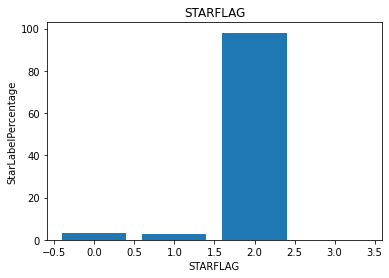

Target_Variable STAR
UniqueValue 3
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1110 and Attributes 78
Qualitative Model
STAR


,STAR,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,0,167,0.0
1,1,0,878,0.0
2,2,232,232,100.0


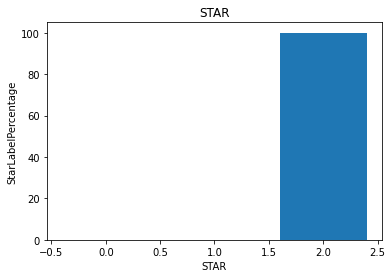

Target_Variable AGE
UniqueValue 76
Records 1277 and Attributes 78
Records 1277 and Attributes 78
Quantitive Model
Co-effictient [0.19449689]
Intercept 9.265933401031976


,Decile_rank,StarLabelsum,StarLabelcount,AGEmin,AGEmax,AGEmean,StarLabelPercentage
9,9,28,128,64,93,71.476562,21.875000
8,8,20,128,58,64,60.687500,15.625000
7,7,30,127,52,58,54.716535,23.622047
6,6,30,128,48,52,49.945312,23.437500
5,5,24,127,44,48,45.937008,18.897638
4,4,22,128,41,44,42.531250,17.187500
3,3,21,128,37,41,39.015625,16.406250
2,2,28,127,34,37,35.559055,22.047244
1,1,15,128,31,34,32.437500,11.718750
0,0,14,128,8,31,25.773438,10.937500


[23.16790273 21.0694636  19.90812954 18.9801415  18.20053871 17.53812938
 16.85435124 16.18205914 15.57492637 14.27878692]


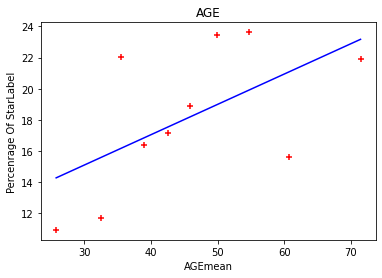

Target_Variable NO_OF_SB_ACCOUNT
UniqueValue 4
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1219 and Attributes 78
Qualitative Model
NO_OF_SB_ACCOUNT


,NO_OF_SB_ACCOUNT,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,15,58,25.862069
1,1,190,1084,17.527675
2,2,22,122,18.032787
3,3,5,13,38.461538


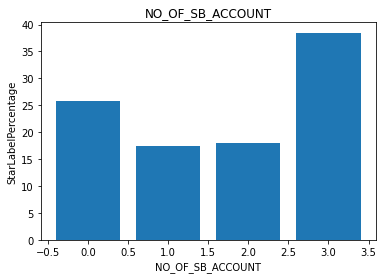

Target_Variable SB_ACCOUNT_BAL
UniqueValue 1130
Records 1277 and Attributes 78
Records 1184 and Attributes 78
GrandTotal_zero has Records 93 and Attributes 78
Quantitive Model
Co-effictient [1.27661679e-05]
Intercept 16.833168706140725


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,SB_ACCOUNT_BALmin,SB_ACCOUNT_BALmax,SB_ACCOUNT_BALmean,StarLabelPercentage
9,9,35,119,235721,25989144,846398.689076,29.411765
8,8,16,118,108945,232305,163750.618644,13.559322
7,7,16,118,65980,108120,86572.974576,13.559322
6,6,16,119,40041,65405,52782.789916,13.445378
5,5,20,118,18808,40021,28792.423729,16.949153
4,4,16,118,9133,18788,13224.322034,13.559322
3,3,21,119,4424,9072,6469.579832,17.647059
2,2,29,118,1111,4380,2380.186441,24.576271
1,1,21,118,179,1103,562.457627,17.796610
0,0,22,119,1,179,62.008403,18.487395


[27.63843647 18.9236366  17.93837383 17.50700266 17.20073762 17.00199262
 16.91576045 16.86355457 16.84034913 16.83396032 16.83316871]


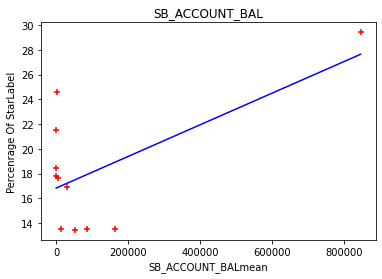

Target_Variable NO_OF_CA_ACCOUNT
UniqueValue 3
Records 1277 and Attributes 78
GrandTotal_nonzero Records 93 and Attributes 78
Qualitative Model
NO_OF_CA_ACCOUNT


,NO_OF_CA_ACCOUNT,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,209,1184,17.652027
1,1,21,89,23.595506
2,2,2,4,50.000000


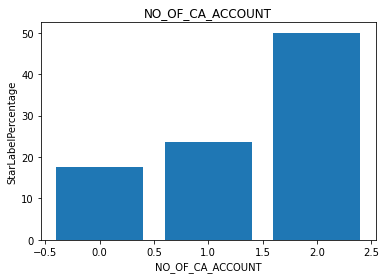

Target_Variable CA_ACCOUNT_BAL
UniqueValue 87
Records 1277 and Attributes 78
Records 87 and Attributes 78
GrandTotal_zero has Records 1190 and Attributes 78
Quantitive Model
Co-effictient [5.08812157e-05]
Intercept 17.452110984308376


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,CA_ACCOUNT_BALmin,CA_ACCOUNT_BALmax,CA_ACCOUNT_BALmean,StarLabelPercentage
9,9,5,9,337518,928447,553885.666667,55.555556
8,8,1,9,198558,314998,262594.000000,11.111111
7,7,2,8,89421,156344,119975.000000,25.000000
6,6,1,9,41880,86515,60631.222222,11.111111
5,5,1,8,24509,37861,31783.125000,12.500000
4,4,3,9,7470,21000,13844.000000,33.333333
3,3,3,9,4869,7360,5957.444444,33.333333
2,2,1,8,3477,4786,4034.000000,12.500000
1,1,2,9,399,2610,959.555556,22.222222
0,0,1,9,1,393,156.777778,11.111111


[45.63448706 30.81321294 23.55658484 20.53710128 19.06927502 18.15651053
 17.755233   17.65736581 17.50093434 17.46008803 17.45211098]


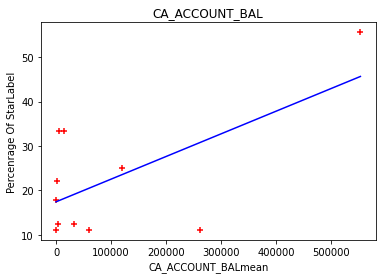

Target_Variable NO_OF_TOTAL_FACILITIES_AVAILED
UniqueValue 16
Records 1277 and Attributes 78
Records 1277 and Attributes 78
Quantitive Model
Co-effictient [2.00346347]
Intercept 3.9675245291224055


,Decile_rank,StarLabelsum,StarLabelcount,NO_OF_TOTAL_FACILITIES_AVAILEDmin,NO_OF_TOTAL_FACILITIES_AVAILEDmax,NO_OF_TOTAL_FACILITIES_AVAILEDmean,StarLabelPercentage
9,9,28,128,11,16,12.429688,21.875000
8,8,39,128,9,11,9.859375,30.468750
7,7,30,127,8,9,8.433071,23.622047
6,6,26,128,7,8,7.593750,20.312500
5,5,28,127,7,7,7.000000,22.047244
4,4,22,128,6,7,6.218750,17.187500
3,3,18,128,6,6,6.000000,14.062500
2,2,15,127,5,6,5.377953,11.811024
1,1,13,128,4,5,4.835938,10.156250
0,0,13,128,1,4,3.140625,10.156250


[28.86994938 23.72042218 20.86287395 19.18132525 17.99176882 16.42656298
 15.98830535 14.74205642 13.65614865 10.25965199]


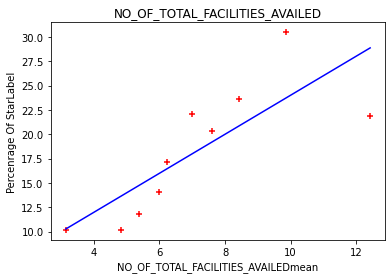

Target_Variable NO_OF_DIGITAL_FACILITIES_AVAILED
UniqueValue 4
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1195 and Attributes 78
Qualitative Model
NO_OF_DIGITAL_FACILITIES_AVAILED


,NO_OF_DIGITAL_FACILITIES_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,17,82,20.731707
1,1,17,127,13.385827
2,2,23,144,15.972222
3,3,175,924,18.939394


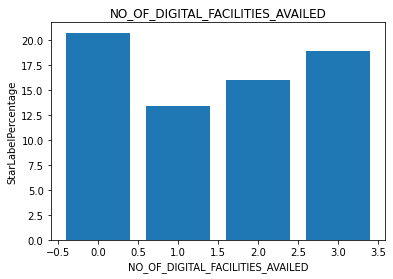

Target_Variable NO_OF_PAYMENT_FACILITIES_AVAILED
UniqueValue 3
Records 1277 and Attributes 78
GrandTotal_nonzero Records 111 and Attributes 78
Qualitative Model
NO_OF_PAYMENT_FACILITIES_AVAILED


,NO_OF_PAYMENT_FACILITIES_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,211,1166,18.096055
1,1,20,105,19.047619
2,2,1,6,16.666667


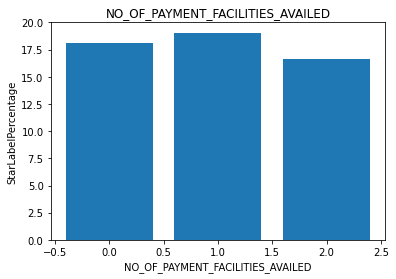

Target_Variable NO_OF_ALTERNATE_FACILITIES_AVAILED
UniqueValue 8
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1277 and Attributes 78
Qualitative Model
NO_OF_ALTERNATE_FACILITIES_AVAILED


,NO_OF_ALTERNATE_FACILITIES_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,1,64,627,10.207337
1,2,112,409,27.383863
2,3,32,113,28.318584
3,4,8,62,12.903226
4,5,12,44,27.272727
5,6,2,17,11.764706
6,7,1,4,25.000000
7,8,1,1,100.000000


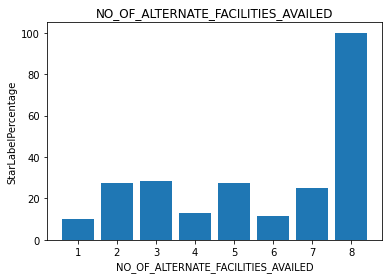

Target_Variable NO_OF_ADVANCE_FACILITIES_AVAILED
UniqueValue 7
Records 1277 and Attributes 78
GrandTotal_nonzero Records 787 and Attributes 78
Qualitative Model
NO_OF_ADVANCE_FACILITIES_AVAILED


,NO_OF_ADVANCE_FACILITIES_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,65,490,13.265306
1,1,55,362,15.193370
2,2,82,328,25.000000
3,3,16,75,21.333333
4,4,8,15,53.333333
5,5,5,6,83.333333
6,6,1,1,100.000000


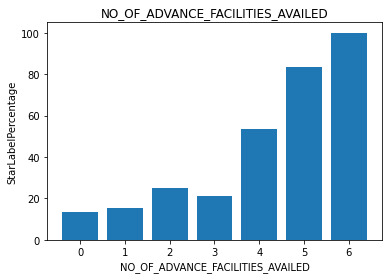

Target_Variable NO_OF_DEPOSIT_FACILITIES_AVAILED
UniqueValue 5
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1251 and Attributes 78
Qualitative Model
NO_OF_DEPOSIT_FACILITIES_AVAILED


,NO_OF_DEPOSIT_FACILITIES_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,3,26,11.538462
1,1,111,613,18.107667
2,2,96,508,18.897638
3,3,22,129,17.054264
4,4,0,1,0.000000


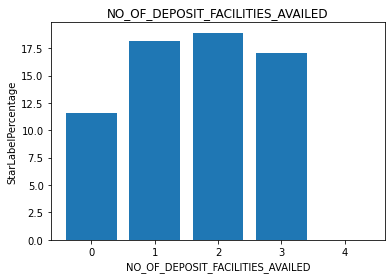

Target_Variable AUM
UniqueValue 1266
Records 1277 and Attributes 78
Records 1265 and Attributes 78
GrandTotal_zero has Records 12 and Attributes 78
Quantitive Model
Co-effictient [1.89794266e-05]
Intercept 0.22151201068150783


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,AUMmin,AUMmax,AUMmean,StarLabelPercentage
9,9,80,127,2252102,27376697,3.585377e+06,62.992126
8,8,68,126,1491544,2211146,1.830588e+06,53.968254
7,7,32,127,1062909,1478799,1.250256e+06,25.196850
6,6,14,126,815521,1061928,9.308858e+05,11.111111
5,5,4,126,606533,811533,7.110109e+05,3.174603
4,4,5,127,430154,602915,5.098905e+05,3.937008
3,3,5,126,302103,429846,3.584519e+05,3.968254
2,2,5,127,174839,301850,2.344659e+05,3.937008
1,1,10,126,47182,174810,1.060384e+05,7.936508
0,0,9,127,1,46662,1.291805e+04,7.086614


[68.26991646 34.96502488 23.9506461  17.88919077 13.71609175  9.89894097
  7.02472273  4.67154076  2.23406089  0.46668914  0.22151201]


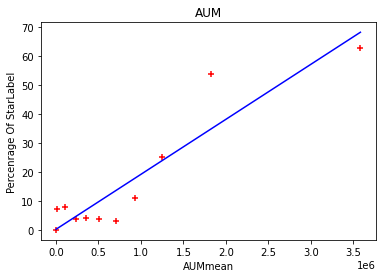

Target_Variable INCOME
UniqueValue 313
Records 1277 and Attributes 78
Records 1259 and Attributes 78
GrandTotal_zero has Records 18 and Attributes 78
Quantitive Model
Co-effictient [3.15428277e-06]
Intercept 12.73801922113758


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,INCOMEmin,INCOMEmax,INCOMEmean,StarLabelPercentage
9,9,47,126,3143000,35000000,8.698386e+06,37.301587
8,8,36,126,2150000,3100000,2.552704e+06,28.571429
7,7,25,126,1250000,2100000,1.649570e+06,19.841270
6,6,18,126,1250000,1250000,1.250000e+06,14.285714
5,5,24,125,850000,1250000,1.041120e+06,19.200000
4,4,22,126,550000,850000,7.009921e+05,17.460317
3,3,26,126,450000,550000,4.982540e+05,20.634921
2,2,11,126,257000,450000,3.512743e+05,8.730159
1,1,10,126,150000,250000,2.099762e+05,7.936508
0,0,11,126,10000,150000,6.742873e+04,8.730159


[40.17518918 20.78996932 17.9412288  16.68087269 16.0220061  14.94914641
 14.30965313 13.84603775 13.4003435  12.9507085  12.73801922]


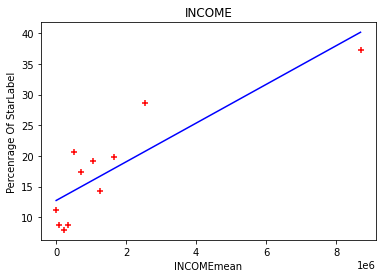

Target_Variable SB_Q1
UniqueValue 1175
Records 1277 and Attributes 78
Records 1199 and Attributes 78
GrandTotal_zero has Records 78 and Attributes 78
Quantitive Model
Co-effictient [2.45429121e-05]
Intercept 16.10504029201743


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,SB_Q1min,SB_Q1max,SB_Q1mean,StarLabelPercentage
9,9,40,120,268478,1640712,559198.283333,33.333333
8,8,12,120,124984,264043,187815.416667,10.000000
7,7,27,120,64262,124229,90921.433333,22.500000
6,6,16,120,38827,64100,49416.550000,13.333333
5,5,13,119,23161,38692,30457.798319,10.924370
4,4,25,120,13294,23102,17801.966667,20.833333
3,3,17,120,7746,13236,10444.475000,14.166667
2,2,18,120,4333,7675,5851.516667,15.000000
1,1,20,120,1636,4314,2902.741667,16.666667
0,0,28,120,1,1599,594.525000,23.333333


[29.82939459 20.71457755 18.33651704 17.31786633 16.85256336 16.54195239
 16.36137812 16.24865355 16.17628203 16.11963167 16.10504029]


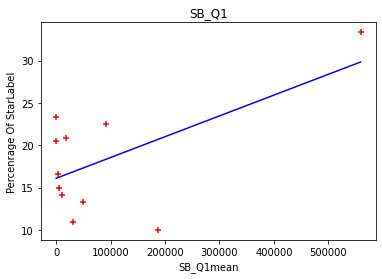

Target_Variable CA_Q1
UniqueValue 103
Records 1277 and Attributes 78
Records 102 and Attributes 78
GrandTotal_zero has Records 1175 and Attributes 78
Quantitive Model
Co-effictient [1.68344629e-05]
Intercept 25.294121000150888


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,CA_Q1min,CA_Q1max,CA_Q1mean,StarLabelPercentage
9,9,4,11,194962,741385,390575.727273,36.363636
8,8,1,10,99904,189430,141548.200000,10.000000
7,7,2,10,66000,98809,85828.700000,20.000000
6,6,3,10,43213,64987,51767.500000,30.000000
5,5,4,10,32945,42702,38638.100000,40.000000
4,4,5,10,19183,31023,24598.200000,50.000000
3,3,3,10,11544,18793,14345.600000,30.000000
2,2,2,10,5073,11127,8759.700000,20.000000
1,1,1,10,531,3596,1989.300000,10.000000
0,0,3,11,1,390,80.363636,27.272727


[31.86925358 27.67700892 26.73900106 26.16559906 25.94457266 25.70821849
 25.53562147 25.44158584 25.3276098  25.29547388 25.294121  ]


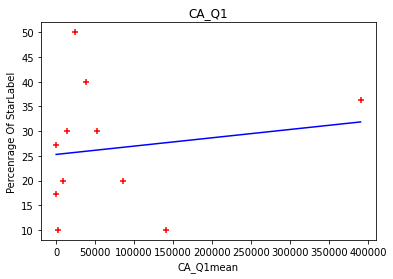

Target_Variable SB_Q2
UniqueValue 1186
Records 1277 and Attributes 78
Records 1201 and Attributes 78
GrandTotal_zero has Records 76 and Attributes 78
Quantitive Model
Co-effictient [1.94027191e-05]
Intercept 16.712789763065896


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,SB_Q2min,SB_Q2max,SB_Q2mean,StarLabelPercentage
9,9,34,120,234476,1756853,504492.433333,28.333333
8,8,20,120,124119,232922,171224.833333,16.666667
7,7,19,120,71877,123901,93098.016667,15.833333
6,6,20,120,43380,71844,56918.666667,16.666667
5,5,22,120,26240,43035,33891.516667,18.333333
4,4,17,120,15193,26153,19869.025000,14.166667
3,3,23,120,9379,15140,12037.350000,19.166667
2,2,14,120,4865,9366,6980.808333,11.666667
1,1,20,120,1875,4860,3480.683333,16.666667
0,0,26,121,1,1866,732.561983,21.487603


[26.50131473 20.03501711 18.51914443 17.81716666 17.37037734 17.09830287
 16.94634708 16.84823643 16.78032448 16.72700346 16.71278976]


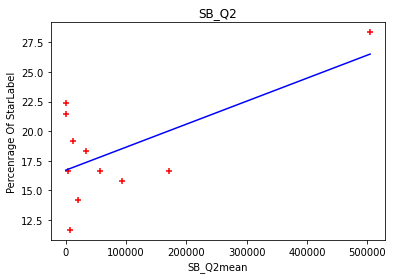

Target_Variable CA_Q2
UniqueValue 103
Records 1277 and Attributes 78
Records 102 and Attributes 78
GrandTotal_zero has Records 1175 and Attributes 78
Quantitive Model
Co-effictient [8.57958758e-05]
Intercept 19.903443511358667


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,CA_Q2min,CA_Q2max,CA_Q2mean,StarLabelPercentage
9,9,7,11,210988,1058358,436510.090909,63.636364
8,8,2,10,109820,200388,149870.300000,20.000000
7,7,2,10,71137,107348,87098.900000,20.000000
6,6,2,10,47839,66808,55612.700000,20.000000
5,5,3,10,30257,46152,38119.500000,30.000000
4,4,0,10,22186,29980,26477.400000,0.000000
3,3,2,10,16594,21920,19079.800000,20.000000
2,2,5,10,8464,16421,11532.000000,50.000000
1,1,4,10,1216,7745,4840.300000,40.000000
0,0,1,11,1,750,165.727273,9.090909


[57.35420908 32.76169716 27.37616992 24.67478382 23.1739394  22.17509523
 21.54041166 20.89284155 20.31872129 19.91766223 19.90344351]


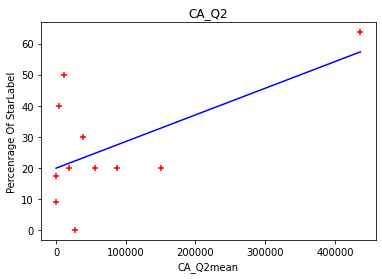

Target_Variable SB_Q3
UniqueValue 1192
Records 1277 and Attributes 78
Records 1204 and Attributes 78
GrandTotal_zero has Records 73 and Attributes 78
Quantitive Model
Co-effictient [1.96515555e-05]
Intercept 16.57733195541073


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,SB_Q3min,SB_Q3max,SB_Q3mean,StarLabelPercentage
9,9,36,121,222873,1822777,509100.421488,29.752066
8,8,17,120,123700,219215,166307.625000,14.166667
7,7,14,120,70772,121425,94210.850000,11.666667
6,6,21,121,41997,70647,55130.338843,17.355372
5,5,24,120,26938,41970,33367.916667,20.000000
4,4,12,120,15937,26831,20704.125000,10.000000
3,3,24,121,8880,15899,11718.752066,19.834711
2,2,20,120,5007,8874,6795.816667,16.666667
1,1,18,120,2059,5003,3435.158333,15.000000
0,0,32,121,1,2057,728.140496,26.446281


[26.58194712 19.84553547 18.4287217  17.66072887 17.23306342 16.98420022
 16.80762366 16.71088032 16.64483816 16.59164105 16.57733196]


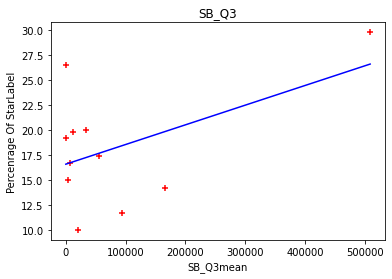

/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


Target_Variable CA_Q3
UniqueValue 104
Records 1277 and Attributes 78
Records 104 and Attributes 78
GrandTotal_zero has Records 1173 and Attributes 78
Quantitive Model
Co-effictient [5.8464639e-05]
Intercept 19.52520688441641


,Decile_rank,StarLabelsum,StarLabelcount,CA_Q3min,CA_Q3max,CA_Q3mean,StarLabelPercentage
9,9,7,11,282744,2643839,711580.000000,63.636364
8,8,2,10,171164,266703,211437.900000,20.000000
7,7,3,10,85973,165306,119534.700000,30.000000
6,6,3,11,49297,81641,63897.363636,27.272727
5,5,2,10,29090,47370,36615.900000,20.000000
4,4,2,10,20651,28565,24119.600000,20.000000
3,3,3,11,12402,19010,15479.909091,27.272727
2,2,2,10,5980,12110,8950.900000,20.000000
1,1,3,10,995,5171,3487.500000,30.000000
0,0,1,11,17,630,264.181818,9.090909


[61.12747468 31.88684737 26.51375996 23.26094318 21.66594226 20.93535059
 20.43023418 20.04851802 19.72910231 19.54065218 19.52520688]


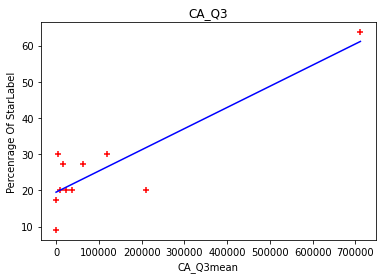

Target_Variable SB_Q4
UniqueValue 1181
Records 1277 and Attributes 78
Records 1204 and Attributes 78
GrandTotal_zero has Records 73 and Attributes 78
Quantitive Model
Co-effictient [1.96832552e-05]
Intercept 16.328488236549827


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,SB_Q4min,SB_Q4max,SB_Q4mean,StarLabelPercentage
9,9,38,121,229031,14553446,720035.983471,31.404959
8,8,23,120,114329,228943,163324.766667,19.166667
7,7,19,120,65944,111942,87227.591667,15.833333
6,6,15,121,40822,65244,51557.884298,12.396694
5,5,18,120,24298,40778,31982.066667,15.000000
4,4,16,120,14972,24293,19208.775000,13.333333
3,3,20,121,8800,14952,11666.785124,16.528926
2,2,18,120,4970,8791,6812.908333,15.000000
1,1,16,120,1994,4947,3583.508333,13.333333
0,0,33,121,1,1947,679.107438,27.272727


[30.50114023 19.5432513  18.04541118 17.34331523 16.95799942 16.70657946
 16.55812855 16.46258845 16.39902335 16.34185528 16.32848824]


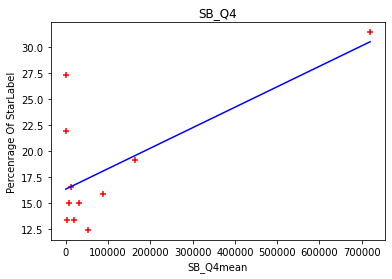

Target_Variable CA_Q4
UniqueValue 105
Records 1277 and Attributes 78
Records 104 and Attributes 78
GrandTotal_zero has Records 1173 and Attributes 78
Quantitive Model
Co-effictient [7.82459046e-05]
Intercept 18.76791178753346


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,CA_Q4min,CA_Q4max,CA_Q4mean,StarLabelPercentage
9,9,7,11,302225,925029,481815.090909,63.636364
8,8,2,10,153786,275885,212229.900000,20.000000
7,7,4,10,95642,150852,118566.700000,40.000000
6,6,1,11,59069,93333,75125.454545,9.090909
5,5,1,10,41394,58946,47388.900000,10.000000
4,4,2,10,22448,40799,31141.700000,20.000000
3,3,3,11,13003,20383,16112.818182,27.272727
2,2,2,10,8806,12836,10775.900000,20.000000
1,1,3,10,3274,8201,5676.700000,30.000000
0,0,3,11,17,2886,797.454545,27.272727


[56.46796941 35.37403229 28.04527048 24.64617093 22.47589913 21.20462227
 20.02867382 19.61108183 19.21209031 18.83030934 18.76791179]


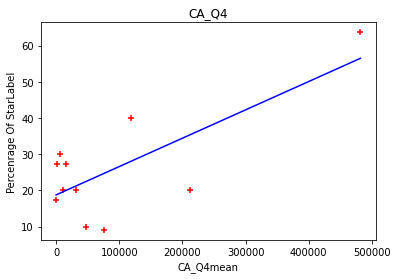

Target_Variable Vintage
UniqueValue 36
Records 1277 and Attributes 78
Records 1277 and Attributes 78
Quantitive Model
Co-effictient [0.30354996]
Intercept 14.154818656843666


,Decile_rank,StarLabelsum,StarLabelcount,Vintagemin,Vintagemax,Vintagemean,StarLabelPercentage
9,9,30,128,20,51,25.101562,23.437500
8,8,21,128,16,20,17.398438,16.406250
7,7,24,127,14,16,15.094488,18.897638
6,6,22,128,13,14,13.390625,17.187500
5,5,28,127,12,13,12.196850,22.047244
4,4,13,128,11,12,11.406250,10.156250
3,3,28,128,10,11,10.593750,21.875000
2,2,22,127,10,10,10.000000,17.322835
1,1,22,128,9,10,9.046875,17.187500
0,0,22,128,5,9,8.062500,17.187500


[21.77439684 19.43611359 18.73674988 18.21954228 17.85717205 17.61718534
 17.370551   17.19031821 16.90099716 16.60219017]


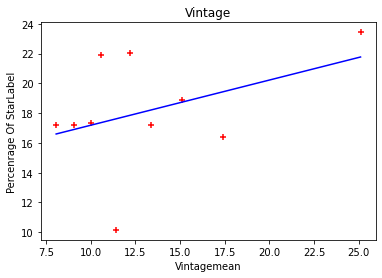

Target_Variable INSURANCE
UniqueValue 1
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1277 and Attributes 78
Qualitative Model
INSURANCE


,INSURANCE,StarLabelsum,StarLabelcount,StarLabelPercentage
0,1,232,1277,18.16758


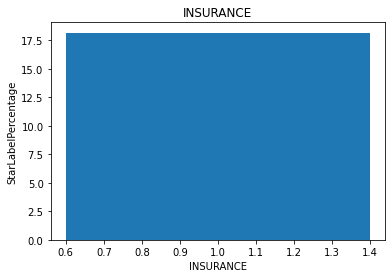

Target_Variable SB_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1205 and Attributes 78
Qualitative Model
SB_FLAG


,SB_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,15,72,20.833333
1,1,217,1205,18.008299


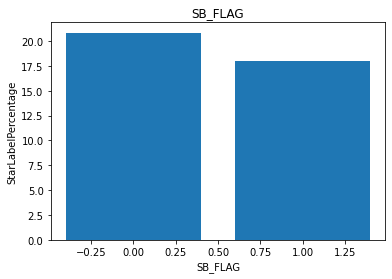

Target_Variable CA_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 93 and Attributes 78
Qualitative Model
CA_FLAG


,CA_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,209,1184,17.652027
1,1,23,93,24.731183


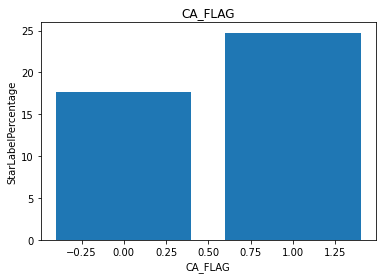

Target_Variable ATM_ELIGIBLE
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1271 and Attributes 78
Qualitative Model
ATM_ELIGIBLE


,ATM_ELIGIBLE,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,0,6,0.000000
1,1,232,1271,18.253344


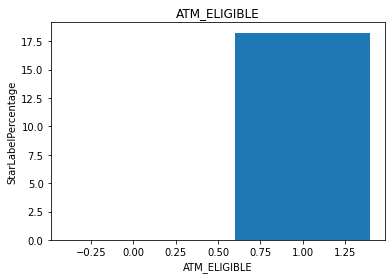

Target_Variable ATM_CARD_AVAILED
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1140 and Attributes 78
Qualitative Model
ATM_CARD_AVAILED


,ATM_CARD_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,27,137,19.708029
1,1,205,1140,17.982456


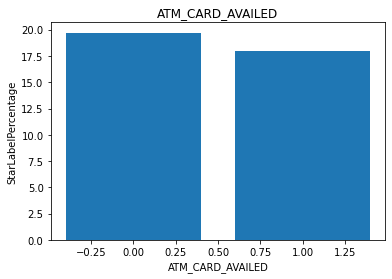

Target_Variable NET_BANKING_AVAILED
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1079 and Attributes 78
Qualitative Model
NET_BANKING_AVAILED


,NET_BANKING_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,34,198,17.171717
1,1,198,1079,18.350324


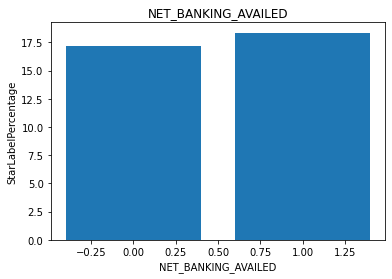

Target_Variable MOBILE_BANKING_AVAILED
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 968 and Attributes 78
Qualitative Model
MOBILE_BANKING_AVAILED


,MOBILE_BANKING_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,47,309,15.210356
1,1,185,968,19.111570


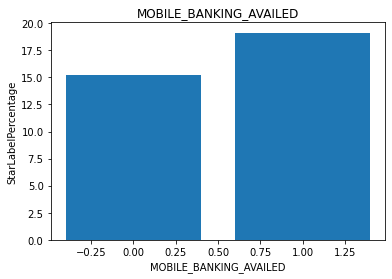

Target_Variable NET_OR_MOBILE_BANKING_AVAILED
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1088 and Attributes 78
Qualitative Model
NET_OR_MOBILE_BANKING_AVAILED


,NET_OR_MOBILE_BANKING_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,32,189,16.931217
1,1,200,1088,18.382353


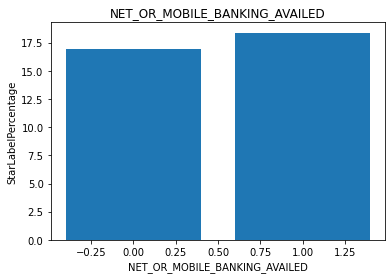

Target_Variable NB_OR_MB_LOGINLAST6MONTHS
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 672 and Attributes 78
Qualitative Model
NB_OR_MB_LOGINLAST6MONTHS


,NB_OR_MB_LOGINLAST6MONTHS,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,105,605,17.355372
1,1,127,672,18.898810


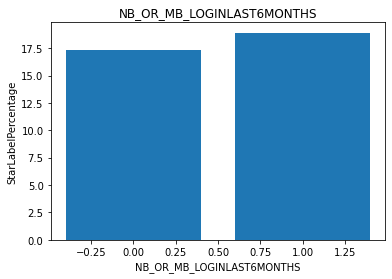

Target_Variable POS_ELIGIBLE
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 387 and Attributes 78
Qualitative Model
POS_ELIGIBLE


,POS_ELIGIBLE,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,144,890,16.179775
1,1,88,387,22.739018


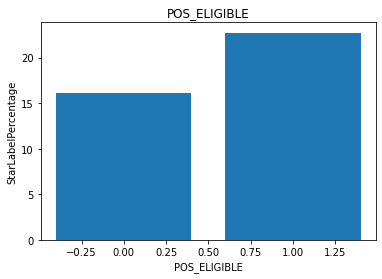

Target_Variable POS_AVAILED
UniqueValue 1
Records 1277 and Attributes 78
GrandTotal_nonzero Records 0 and Attributes 78
Qualitative Model
POS_AVAILED


,POS_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,232,1277,18.16758


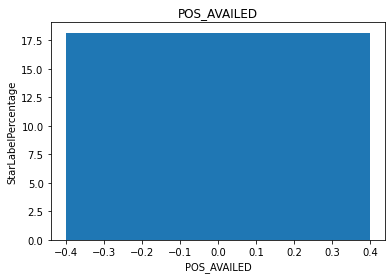

Target_Variable BHARATH_QR_AVAILED
UniqueValue 1
Records 1277 and Attributes 78
GrandTotal_nonzero Records 0 and Attributes 78
Qualitative Model
BHARATH_QR_AVAILED


,BHARATH_QR_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,232,1277,18.16758


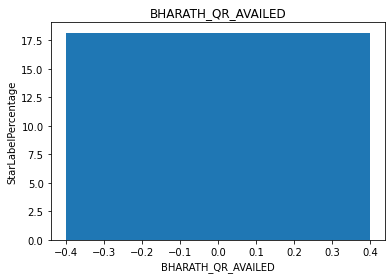

Target_Variable POS_BHARATH_AVAIELD
UniqueValue 1
Records 1277 and Attributes 78
GrandTotal_nonzero Records 0 and Attributes 78
Qualitative Model
POS_BHARATH_AVAIELD


,POS_BHARATH_AVAIELD,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,232,1277,18.16758


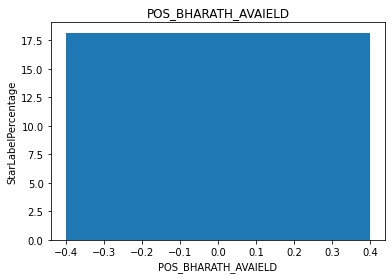

Target_Variable OTHER_BANK_POS
UniqueValue 1
Records 1277 and Attributes 78
GrandTotal_nonzero Records 0 and Attributes 78
Qualitative Model
OTHER_BANK_POS


,OTHER_BANK_POS,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,232,1277,18.16758


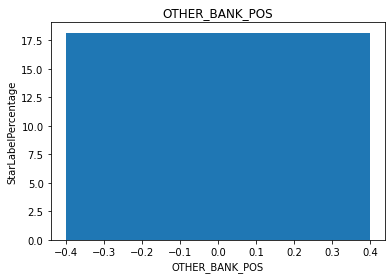

Target_Variable CREDIT_CARD_AVAILED
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 252 and Attributes 78
Qualitative Model
CREDIT_CARD_AVAILED


,CREDIT_CARD_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,188,1025,18.341463
1,1,44,252,17.460317


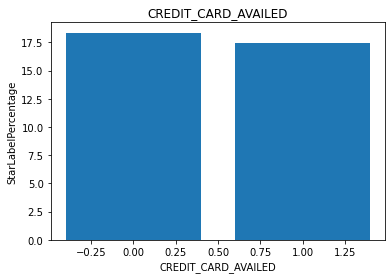

Target_Variable SGB_AVAILED
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 84 and Attributes 78
Qualitative Model
SGB_AVAILED


,SGB_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,222,1193,18.608550
1,1,10,84,11.904762


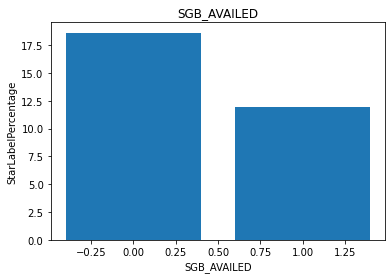

Target_Variable FASTAG_AVAILED
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 11 and Attributes 78
Qualitative Model
FASTAG_AVAILED


,FASTAG_AVAILED,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,230,1266,18.167457
1,1,2,11,18.181818


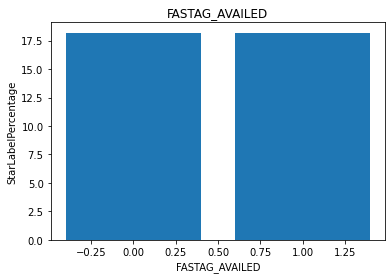

Target_Variable ACTIVE_SB_OR_CA
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1216 and Attributes 78
Qualitative Model
ACTIVE_SB_OR_CA


,ACTIVE_SB_OR_CA,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,13,61,21.311475
1,1,219,1216,18.009868


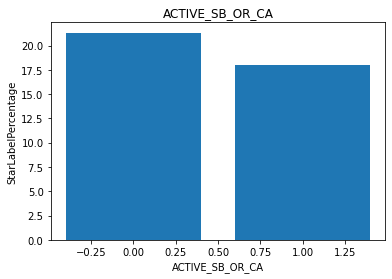

Target_Variable DEPOSIT_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 602 and Attributes 78
Qualitative Model
DEPOSIT_FLAG


,DEPOSIT_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,123,675,18.222222
1,1,109,602,18.106312


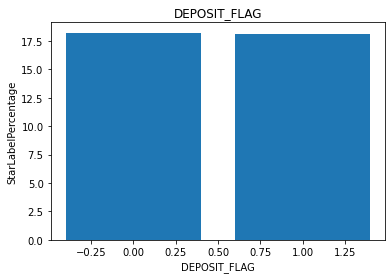

Target_Variable FD_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 555 and Attributes 78
Qualitative Model
FD_FLAG


,FD_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,125,722,17.313019
1,1,107,555,19.279279


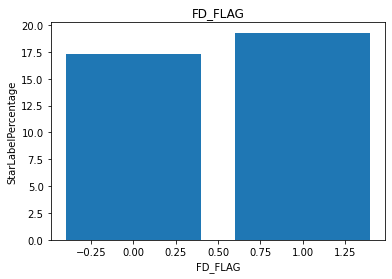

Target_Variable RD_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 167 and Attributes 78
Qualitative Model
RD_FLAG


,RD_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,210,1110,18.918919
1,1,22,167,13.173653


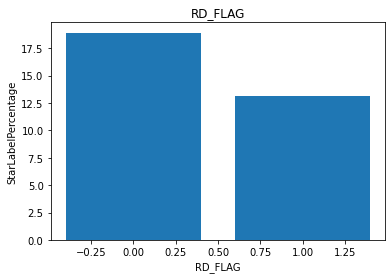

Target_Variable JL_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 338 and Attributes 78
Qualitative Model
JL_FLAG


,JL_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,180,939,19.169329
1,1,52,338,15.384615


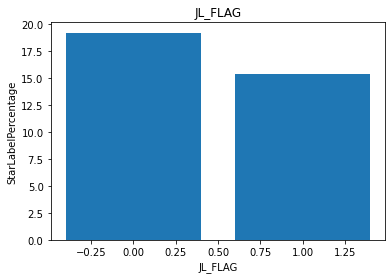

Target_Variable TERM_LOAN
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 522 and Attributes 78
Qualitative Model
TERM_LOAN


,TERM_LOAN,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,94,755,12.450331
1,1,138,522,26.436782


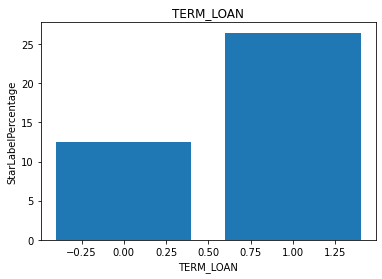

Target_Variable DEPOSIT_ONLY
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 8 and Attributes 78
Qualitative Model
DEPOSIT_ONLY


,DEPOSIT_ONLY,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,231,1269,18.20331
1,1,1,8,12.50000


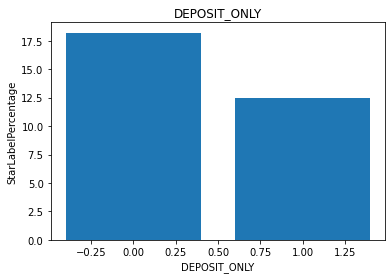

Target_Variable JL_ONLY
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 2 and Attributes 78
Qualitative Model
JL_ONLY


,JL_ONLY,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,232,1275,18.196078
1,1,0,2,0.000000


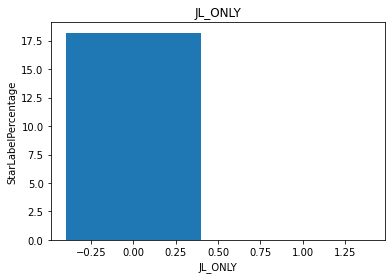

Target_Variable OD_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 294 and Attributes 78
Qualitative Model
OD_FLAG


,OD_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,164,983,16.683622
1,1,68,294,23.129252


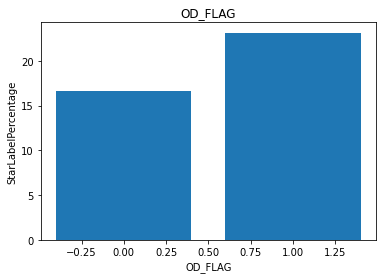

Target_Variable ANY_ACTIVE_ACCOUNT
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1271 and Attributes 78
Qualitative Model
ANY_ACTIVE_ACCOUNT


,ANY_ACTIVE_ACCOUNT,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,0,6,0.000000
1,1,232,1271,18.253344


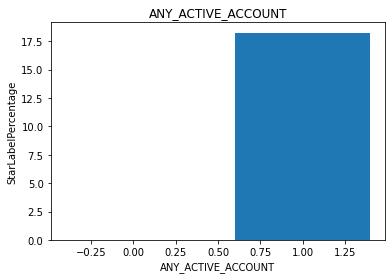

Target_Variable CLOSED_ACCOUNT
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1175 and Attributes 78
Qualitative Model
CLOSED_ACCOUNT


,CLOSED_ACCOUNT,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,22,102,21.568627
1,1,210,1175,17.872340


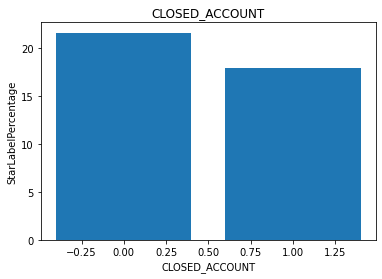

Target_Variable FISDOM_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 119 and Attributes 78
Qualitative Model
FISDOM_FLAG


,FISDOM_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,211,1158,18.221071
1,1,21,119,17.647059


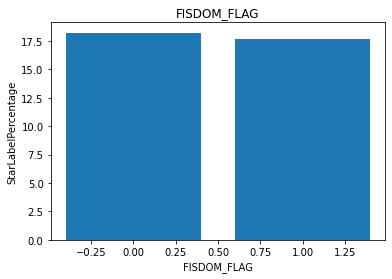

Target_Variable SOCIAL_MEDIA_BANKING_FLAG
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 16 and Attributes 78
Qualitative Model
SOCIAL_MEDIA_BANKING_FLAG


,SOCIAL_MEDIA_BANKING_FLAG,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,228,1261,18.080888
1,1,4,16,25.000000


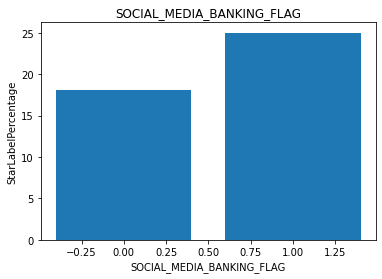

Target_Variable LADODAD
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 106 and Attributes 78
Qualitative Model
LADODAD


,LADODAD,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,211,1171,18.018787
1,1,21,106,19.811321


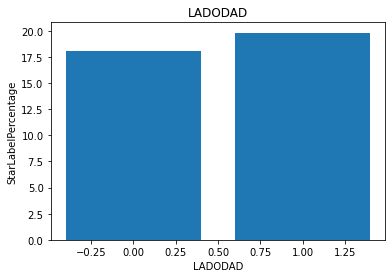

Target_Variable DHARANI
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 11 and Attributes 78
Qualitative Model
DHARANI


,DHARANI,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,227,1266,17.930490
1,1,5,11,45.454545


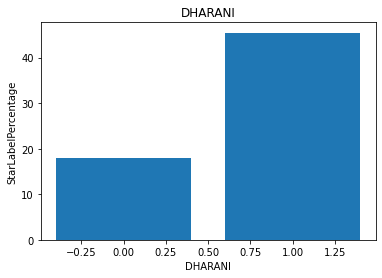

Target_Variable EASY_RIDE
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 2 and Attributes 78
Qualitative Model
EASY_RIDE


,EASY_RIDE,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,232,1275,18.196078
1,1,0,2,0.000000


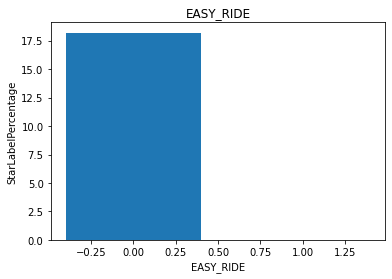

Target_Variable YOHAVAHANA
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 10 and Attributes 78
Qualitative Model
YOHAVAHANA


,YOHAVAHANA,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,230,1267,18.153118
1,1,2,10,20.000000


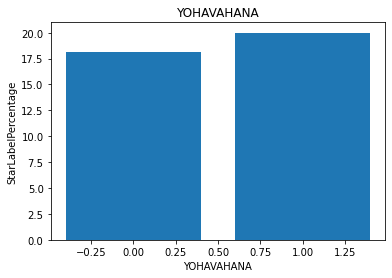

Target_Variable SWAYAMGRIHA
UniqueValue 1
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1277 and Attributes 78
Qualitative Model
SWAYAMGRIHA


,SWAYAMGRIHA,StarLabelsum,StarLabelcount,StarLabelPercentage
0,1,232,1277,18.16758


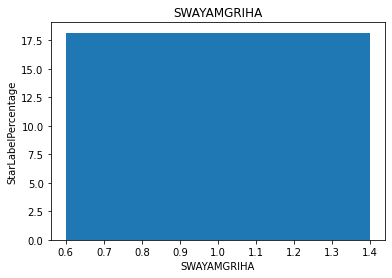

Target_Variable EDUCATION_LOAN
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 3 and Attributes 78
Qualitative Model
EDUCATION_LOAN


,EDUCATION_LOAN,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,230,1274,18.053375
1,1,2,3,66.666667


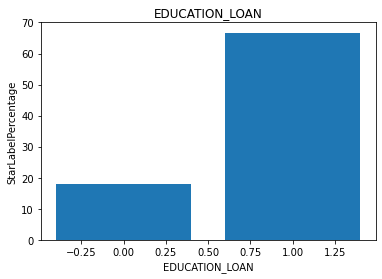

Target_Variable OLCC
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1 and Attributes 78
Qualitative Model
OLCC


,OLCC,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,232,1276,18.181818
1,1,0,1,0.000000


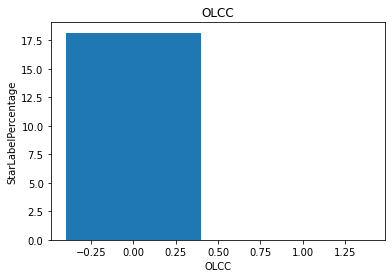

Target_Variable PERSONAL_LOAN
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 40 and Attributes 78
Qualitative Model
PERSONAL_LOAN


,PERSONAL_LOAN,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,231,1237,18.674212
1,1,1,40,2.500000


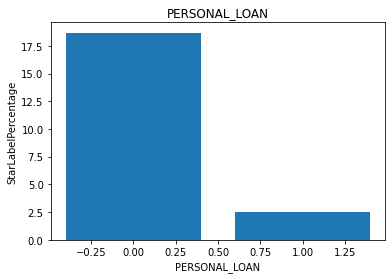

Target_Variable MIAL_ID
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 878 and Attributes 78
Qualitative Model
MIAL_ID


,MIAL_ID,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,68,399,17.042607
1,1,164,878,18.678815


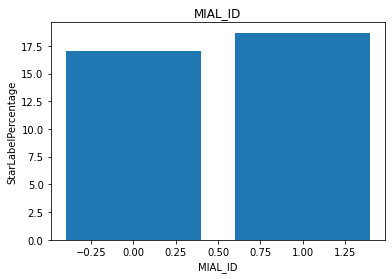

Target_Variable MOBILE
UniqueValue 1
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1277 and Attributes 78
Qualitative Model
MOBILE


,MOBILE,StarLabelsum,StarLabelcount,StarLabelPercentage
0,1,232,1277,18.16758


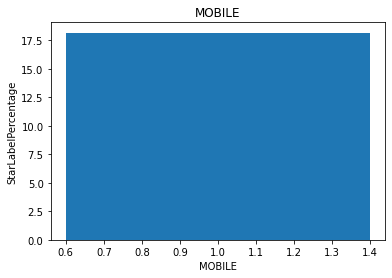

Target_Variable ASBA
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 73 and Attributes 78
Qualitative Model
ASBA


,ASBA,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,221,1204,18.355482
1,1,11,73,15.068493


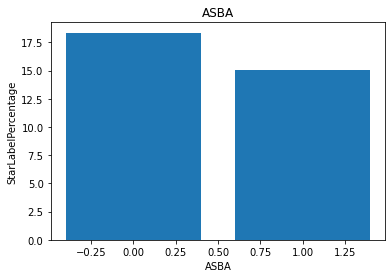

Target_Variable AADHAAR
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 609 and Attributes 78
Qualitative Model
AADHAAR


,AADHAAR,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,123,668,18.413174
1,1,109,609,17.898194


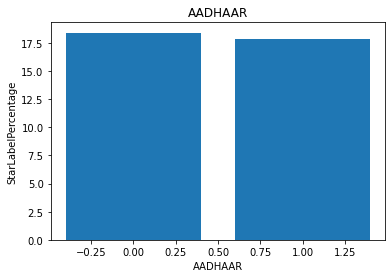

Target_Variable WORKING_CAPITAL
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 53 and Attributes 78
Qualitative Model
WORKING_CAPITAL


,WORKING_CAPITAL,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,209,1224,17.075163
1,1,23,53,43.396226


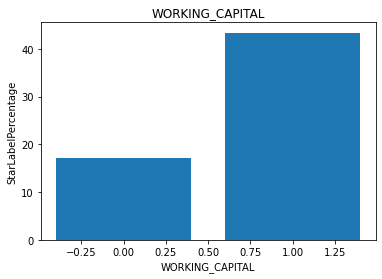

Target_Variable LOCKER
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 222 and Attributes 78
Qualitative Model
LOCKER


,LOCKER,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,181,1055,17.156398
1,1,51,222,22.972973


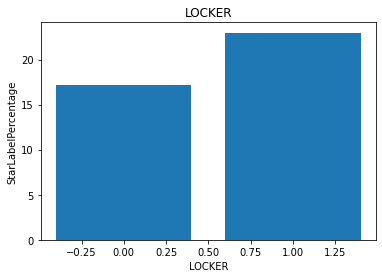

Target_Variable GENDER
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 1005 and Attributes 78
Qualitative Model
GENDER


,GENDER,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,43,272,15.808824
1,1,189,1005,18.805970


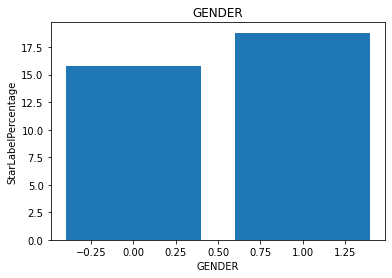

Target_Variable INSURANCE1
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 289 and Attributes 78
Qualitative Model
INSURANCE1


,INSURANCE1,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,111,988,11.234818
1,1,121,289,41.868512


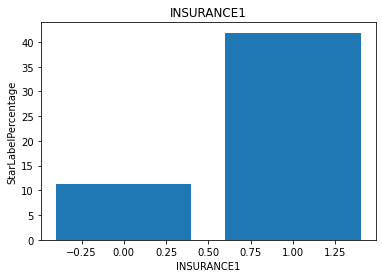

Target_Variable DEMAT
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 74 and Attributes 78
Qualitative Model
DEMAT


,DEMAT,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,219,1203,18.204489
1,1,13,74,17.567568


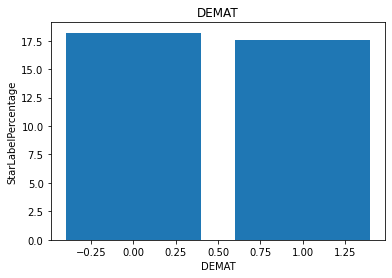

Target_Variable WHATSAPP_BANKING
UniqueValue 2
Records 1277 and Attributes 78
GrandTotal_nonzero Records 90 and Attributes 78
Qualitative Model
WHATSAPP_BANKING


,WHATSAPP_BANKING,StarLabelsum,StarLabelcount,StarLabelPercentage
0,0,216,1187,18.197136
1,1,16,90,17.777778


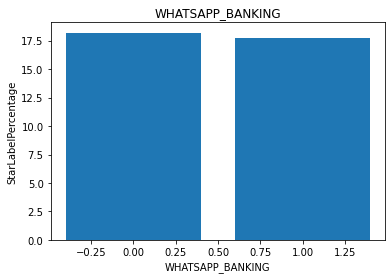

Target_Variable StarLabel
UniqueValue 2
Target_Variable Total_Account_Balance
UniqueValue 1158
Records 1277 and Attributes 78
Records 1209 and Attributes 78
GrandTotal_zero has Records 68 and Attributes 78
Quantitive Model
Co-effictient [1.3903192e-05]
Intercept 16.61732818591608


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,Total_Account_Balancemin,Total_Account_Balancemax,Total_Account_Balancemean,StarLabelPercentage
9,9,36,121,256893,25989144,865529.628099,29.752066
8,8,22,121,122658,256024,181195.380165,18.181818
7,7,15,121,72446,121872,93360.057851,12.396694
6,6,16,121,44024,72314,57079.537190,13.223140
5,5,21,120,22427,43210,32787.058333,17.500000
4,4,16,121,10627,22376,15271.198347,13.223140
3,3,20,121,4869,10581,7323.140496,16.528926
2,2,27,121,1256,4805,2813.165289,22.314050
1,1,21,121,205,1235,640.471074,17.355372
0,0,25,121,1,204,71.677686,20.661157


[28.65095279 19.13652235 17.915331   17.41091595 17.07317295 16.82964659
 16.71914321 16.65644016 16.62623278 16.61832473 16.61732819]


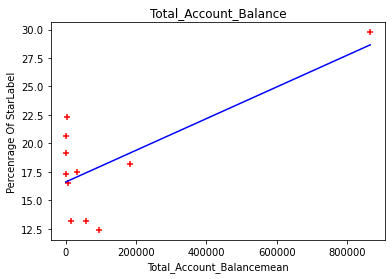

Target_Variable Total_Acct_sum_of_Q1
UniqueValue 1202
Records 1277 and Attributes 78
Records 1223 and Attributes 78
GrandTotal_zero has Records 54 and Attributes 78
Quantitive Model
Co-effictient [2.94644471e-05]
Intercept 15.301512275039922


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,Total_Acct_sum_of_Q1min,Total_Acct_sum_of_Q1max,Total_Acct_sum_of_Q1mean,StarLabelPercentage
9,9,44,123,273558,1640712,566758.674797,35.772358
8,8,11,122,139926,273359,200112.811475,9.016393
7,7,28,122,74512,135499,101695.540984,22.950820
6,6,18,122,43071,74327,54935.188525,14.754098
5,5,15,122,26398,42770,34160.672131,12.295082
4,4,24,123,15394,26261,20363.113821,19.512195
3,3,23,122,8716,15353,11701.245902,18.852459
2,2,11,122,4565,8683,6428.860656,9.016393
1,1,22,122,1791,4558,3167.795082,18.032787
0,0,28,123,1,1789,694.626016,22.764228


[32.00074327 21.19772562 18.29791516 16.92014723 16.30803759 15.90150017
 15.64628302 15.4909351  15.39484961 15.32197905 15.30151228]


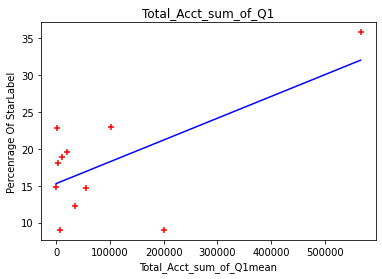

Target_Variable Total_Acct_sum_of_Q4
UniqueValue 1209
Records 1277 and Attributes 78
Records 1229 and Attributes 78


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


GrandTotal_zero has Records 48 and Attributes 78
Quantitive Model
Co-effictient [2.56164583e-05]
Intercept 15.258637334250663


,Decile_rank,StarLabelsum,StarLabelcount,Total_Acct_sum_of_Q4min,Total_Acct_sum_of_Q4max,Total_Acct_sum_of_Q4mean,StarLabelPercentage
9,9,43,123,259988,14553446,741370.333333,34.959350
8,8,25,123,126094,254285,181875.430894,20.325203
7,7,18,123,75399,125751,95962.317073,14.634146
6,6,17,123,45950,75387,58018.772358,13.821138
5,5,15,122,28034,45523,36555.614754,12.295082
4,4,19,123,17476,28032,22051.512195,15.447154
3,3,21,123,10077,17456,13594.642276,17.073171
2,2,18,123,5707,10036,7680.634146,14.634146
1,1,17,123,2394,5699,4022.341463,13.821138
0,0,32,123,1,2368,821.065041,26.016260


[34.24991956 19.91764172 17.71685203 16.7448728  16.19506271 15.82351898
 15.60688392 15.45538798 15.36167548 15.27967011 15.25863733]


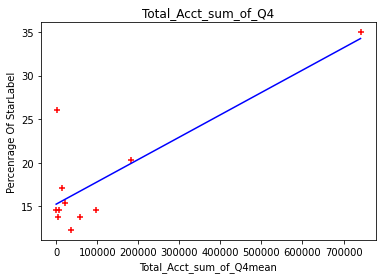

Target_Variable Total_Acct_Sum_Difference
UniqueValue 1218
Records 1277 and Attributes 78


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


Records 1225 and Attributes 78
GrandTotal_zero has Records 52 and Attributes 78
Quantitive Model
Co-effictient [-1.23949994e-05]
Intercept 17.826591467979842


,Decile_rank,StarLabelsum,StarLabelcount,Total_Acct_Sum_Differencemin,Total_Acct_Sum_Differencemax,Total_Acct_Sum_Differencemean,StarLabelPercentage
9,9,31,123,102902,1001216,287983.463415,25.203252
8,8,20,122,29547,102320,56842.114754,16.393443
7,7,21,123,8137,29347,16314.073171,17.073171
6,6,19,122,1161,7939,3591.614754,15.573770
5,5,20,122,-639,1146,214.049180,16.393443
4,4,21,123,-4315,-644,-2173.918699,17.073171
3,3,17,122,-13047,-4414,-8395.254098,13.934426
2,2,17,123,-34691,-13051,-21647.113821,13.821138
1,1,20,122,-89411,-34890,-58665.024590,16.393443
0,0,38,123,-13483328,-91071,-439104.308943,30.894309


[14.25703662 17.12203349 17.62437854 17.78207341 17.82393833 17.85353719
 17.93065064 18.09490743 18.55374441 23.26928911 17.82659147]


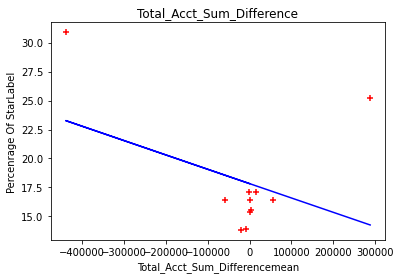

Target_Variable Total_Acct_Sum_Percentage
UniqueValue 1217
Records 1277 and Attributes 78
Records 1217 and Attributes 78
GrandTotal_zero has Records 60 and Attributes 78
Quantitive Model
Co-effictient [-0.00087833]
Intercept 17.43852287527496


/tmp/ipykernel_226483/1482245758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)


,Decile_rank,StarLabelsum,StarLabelcount,Total_Acct_Sum_Percentagemin,Total_Acct_Sum_Percentagemax,Total_Acct_Sum_Percentagemean,StarLabelPercentage
9,9,33,122,81.217309,100.000000,91.113197,27.049180
8,8,19,122,59.487740,81.004532,71.246102,15.573770
7,7,26,121,37.586663,59.436157,49.295961,21.487603
6,6,19,122,15.014762,37.575854,26.620540,15.573770
5,5,14,121,-4.871437,14.928948,4.033955,11.570248
4,4,23,122,-34.092570,-4.956911,-18.387155,18.852459
3,3,17,122,-87.590310,-34.147184,-59.091236,13.934426
2,2,20,121,-180.242354,-87.979019,-127.285991,16.528926
1,1,21,122,-548.344158,-180.256878,-304.569038,17.213115
0,0,30,122,-190072.727273,-548.426779,-7949.259820,24.590164


[17.35849577 17.37594556 17.39522494 17.41514136 17.43497975 17.4546728
 17.49042426 17.5503215  17.70603384 24.42056614 17.43852288]


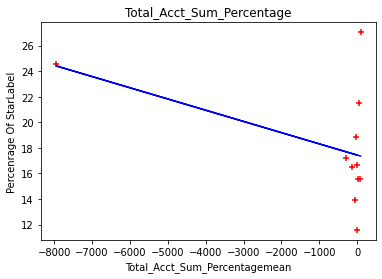

In [36]:
for i in DFColumns:
    print("Target_Variable {}".format(i))
    UniqueValue=len(set(sampledataframe[i].values))
    print("UniqueValue {}".format(UniqueValue))
    if UniqueValue >= 10 and i != DependentFeature :
        Records,Columns=sampledataframe.shape
        print("Records {} and Attributes {}".format(Records,Columns))
        GrandTotal=sampledataframe.sort_values(by=[i],ascending=False)
        GrandTotal_nonzero=GrandTotal[GrandTotal[i]!=0]
        Records,Columns=GrandTotal_nonzero.shape
        print("Records {} and Attributes {}".format(Records,Columns))        
        GrandTotal_nonzero['Decile_rank'] = pd.qcut(GrandTotal_nonzero[i].rank(method="first"), 10,labels = False)
        
        FinalDataFrame=GrandTotal_nonzero.groupby("Decile_rank").agg({DependentFeature:['sum','count'],i:['min','max','mean']})
        FinalDataFrame.columns=["".join(j) for j in list(FinalDataFrame.columns)]
        FinalDataFrame.reset_index(inplace=True)
        # # FinalDataFrame["StarPercentage"]=FinalDataFrame["StarLabelmean"]*100
        FinalDataFrame[DependentFeature+"Percentage"]=FinalDataFrame[DependentFeature+"sum"]/FinalDataFrame[DependentFeature+"count"]*100
        FinalDataFrame.sort_values(by=[i+"mean"],ascending=False,inplace=True)
        
        GrandTotal_zero=GrandTotal[GrandTotal[i]==0]
        Records,Columns=GrandTotal_zero.shape
        
        if Records != 0 :
            print("GrandTotal_zero has Records {} and Attributes {}".format(Records,Columns))
            FinalDataFrame2=pd.DataFrame()
            FinalDataFrame2["Decile_rank"]=[10]
            FinalDataFrame2[DependentFeature+"sum"]=[GrandTotal_zero[DependentFeature].sum()]
            FinalDataFrame2[DependentFeature+"count"]=[GrandTotal_zero[DependentFeature].count()]
            FinalDataFrame2[i+"mean"]=[GrandTotal_zero[i].mean()]
            FinalDataFrame2[i+"min"]=[GrandTotal_zero[i].min()]
            FinalDataFrame2[i+"max"]=[GrandTotal_zero[i].max()]
            FinalDataFrame2[DependentFeature+"Percentage"]=[(GrandTotal_zero[DependentFeature].sum()/ GrandTotal_zero[DependentFeature].count())*100]
            FinalDataFrame = pd.concat([FinalDataFrame,FinalDataFrame2],axis=0)
        
        else:pass
        LinearModel(FinalDataFrame,i,DependentFeature)
    
    elif UniqueValue < 10  and i != DependentFeature:
        Records,Columns=sampledataframe.shape
        print("Records {} and Attributes {}".format(Records,Columns))
        GrandTotal=sampledataframe.sort_values(by=[i],ascending=False)
        GrandTotal_nonzero=GrandTotal[GrandTotal[i]!=0]
        Records,Columns=GrandTotal_nonzero.shape
        print("GrandTotal_nonzero Records {} and Attributes {}".format(Records,Columns))
        CategoricalValues(i)
#         break
        

In [37]:
sampledataframe

,STARFLAG,STAR,AGE,NO_OF_SB_ACCOUNT,SB_ACCOUNT_BAL,NO_OF_CA_ACCOUNT,CA_ACCOUNT_BAL,NO_OF_TOTAL_FACILITIES_AVAILED,NO_OF_DIGITAL_FACILITIES_AVAILED,NO_OF_PAYMENT_FACILITIES_AVAILED,...,GENDER,INSURANCE1,DEMAT,WHATSAPP_BANKING,StarLabel,Total_Account_Balance,Total_Acct_sum_of_Q1,Total_Acct_sum_of_Q4,Total_Acct_Sum_Difference,Total_Acct_Sum_Percentage
0,2,2,56,1,94,1,928447,10,3,0,...,0,0,0,0,1,928541,742336,374032,368304,49.614191
1,2,2,51,1,266,0,0,9,3,0,...,1,1,0,0,1,266,24847,108710,-83863,-337.517608
2,2,2,71,1,401511,0,0,5,0,0,...,0,0,0,0,1,401511,118190,370974,-252784,-213.879347
4,1,1,41,2,511787,0,0,7,2,0,...,1,0,0,0,0,511787,183758,549444,-365686,-199.004125
5,1,1,52,2,9214,0,0,12,3,0,...,0,1,1,0,0,9214,487116,471734,15382,3.157769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,39,1,8457,0,0,5,3,0,...,1,0,0,0,0,8457,8210,11009,-2799,-34.092570
1496,0,0,46,1,18264,0,0,6,3,0,...,1,0,0,0,0,18264,106616,82491,24125,22.627936
1497,1,1,38,1,121872,0,0,7,3,0,...,1,0,0,0,0,121872,616754,55464,561290,91.007111
1498,1,1,65,1,205198,0,0,6,3,0,...,1,0,0,0,0,205198,121566,217977,-96411,-79.307537


### Building The Model